# Blackbox Optimization with NN driven model

In [1]:
# Python libraries
import os
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
# https://docs.scipy.org/doc/scipy/tutorial/optimize.html#broyden-fletcher-goldfarb-shanno-algorithm-method-bfgs
import scipy.optimize as optimize
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# To enable LaTeX and select a font
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

# Using ipynb import functions defined in other nb
from ipynb.fs.defs.myfun_load_dataset import *
from ipynb.fs.defs.myfun_models import *
from ipynb.fs.defs.myfun_plot import *

2023-08-26 15:28:27.774013: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow/Keras: 2.11.0
sklearn: 1.3.0


# Step 1: Synthetic data

## Data Acquisition

In [2]:
# Load the dataset
par_dir = os.path.dirname(os.getcwd()) # parent dir
dir_name = par_dir + "/NN-interaction"
merged_df, dflist = load_dataset(dir_name, 'post')

In [3]:
# For sake of simplicity conseder only a scene
df = dflist[0] # sequence
scn = df.T[5]  # scene

In [4]:
# Useful params
N = scn['N. vehicles']
tstamps = scn['Tarr']

## Create the model NN

In [5]:
DOE =[[1,2,1]] #Design of experiment

In [6]:
model = create_model(DOE[0])
# model.summary()

## Evaluate the NN in each time interval

In [7]:
# parameters to set
epochs = 200           # An epoch is an iteration over the entire x and y data provided
batch_size = 100       # Number of samples per gradient update.
v0 = 30

In [8]:
t_ann_end, x_ann_end, vel_ann_end = odesolver_ann_scene(model, scn, epochs, batch_size, v0, verbose='auto')

We have 2 time intervals inside [131.64,132.04]

----------------------------------------------------------------------------------------------------
Time interval n.0: [131.64, 131.84]

Epoch 1/200
1/1 [==============================] - 0s 436ms/step - loss: 879.3895 - mean_absolute_error: 29.6453
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 879.2415 - mean_absolute_error: 29.6428
Epoch 3/200
1/1 [==============================] - 0s 12ms/step - loss: 879.0933 - mean_absolute_error: 29.6404
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 878.9453 - mean_absolute_error: 29.6379
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 878.7971 - mean_absolute_error: 29.6354
Epoch 6/200
1/1 [==============================] - 0s 21ms/step - loss: 878.6489 - mean_absolute_error: 29.6330
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 878.5006 - mean_absolute_error: 29.6305
Epoch 8/200
1/1 [===========

1/1 [==============================] - 0s 18ms/step - loss: 868.8323 - mean_absolute_error: 29.4691
Epoch 72/200
1/1 [==============================] - 0s 15ms/step - loss: 868.6769 - mean_absolute_error: 29.4665
Epoch 73/200
1/1 [==============================] - 0s 11ms/step - loss: 868.5212 - mean_absolute_error: 29.4639
Epoch 74/200
1/1 [==============================] - 0s 13ms/step - loss: 868.3655 - mean_absolute_error: 29.4613
Epoch 75/200
1/1 [==============================] - 0s 7ms/step - loss: 868.2095 - mean_absolute_error: 29.4587
Epoch 76/200
1/1 [==============================] - 0s 7ms/step - loss: 868.0532 - mean_absolute_error: 29.4561
Epoch 77/200
1/1 [==============================] - 0s 11ms/step - loss: 867.8969 - mean_absolute_error: 29.4535
Epoch 78/200
1/1 [==============================] - 0s 6ms/step - loss: 867.7404 - mean_absolute_error: 29.4509
Epoch 79/200
1/1 [==============================] - 0s 7ms/step - loss: 867.5836 - mean_absolute_error: 29.4482


1/1 [==============================] - 0s 18ms/step - loss: 857.0084 - mean_absolute_error: 29.2703
Epoch 144/200
1/1 [==============================] - 0s 12ms/step - loss: 856.8317 - mean_absolute_error: 29.2673
Epoch 145/200
1/1 [==============================] - 0s 16ms/step - loss: 856.6545 - mean_absolute_error: 29.2643
Epoch 146/200
1/1 [==============================] - 0s 22ms/step - loss: 856.4768 - mean_absolute_error: 29.2613
Epoch 147/200
1/1 [==============================] - 0s 41ms/step - loss: 856.2985 - mean_absolute_error: 29.2583
Epoch 148/200
1/1 [==============================] - 0s 15ms/step - loss: 856.1198 - mean_absolute_error: 29.2553
Epoch 149/200
1/1 [==============================] - 0s 17ms/step - loss: 855.9404 - mean_absolute_error: 29.2522
Epoch 150/200
1/1 [==============================] - 0s 11ms/step - loss: 855.7605 - mean_absolute_error: 29.2492
Epoch 151/200
1/1 [==============================] - 0s 10ms/step - loss: 855.5801 - mean_absolute_err

1/1 [==============================] - 0s 21ms/step - loss: 795.0416 - mean_absolute_error: 28.1903
Epoch 13/200
1/1 [==============================] - 0s 21ms/step - loss: 794.8107 - mean_absolute_error: 28.1862
Epoch 14/200
1/1 [==============================] - 0s 22ms/step - loss: 794.5769 - mean_absolute_error: 28.1821
Epoch 15/200
1/1 [==============================] - 0s 23ms/step - loss: 794.3401 - mean_absolute_error: 28.1779
Epoch 16/200
1/1 [==============================] - 0s 23ms/step - loss: 794.1003 - mean_absolute_error: 28.1737
Epoch 17/200
1/1 [==============================] - 0s 16ms/step - loss: 793.8572 - mean_absolute_error: 28.1694
Epoch 18/200
1/1 [==============================] - 0s 16ms/step - loss: 793.6106 - mean_absolute_error: 28.1650
Epoch 19/200
1/1 [==============================] - 0s 22ms/step - loss: 793.3604 - mean_absolute_error: 28.1606
Epoch 20/200
1/1 [==============================] - 0s 15ms/step - loss: 793.1064 - mean_absolute_error: 28.1

1/1 [==============================] - 0s 10ms/step - loss: 747.3635 - mean_absolute_error: 27.3184
Epoch 85/200
1/1 [==============================] - 0s 10ms/step - loss: 745.7292 - mean_absolute_error: 27.2876
Epoch 86/200
1/1 [==============================] - 0s 10ms/step - loss: 744.0614 - mean_absolute_error: 27.2561
Epoch 87/200
1/1 [==============================] - 0s 12ms/step - loss: 742.3608 - mean_absolute_error: 27.2239
Epoch 88/200
1/1 [==============================] - 0s 9ms/step - loss: 740.6287 - mean_absolute_error: 27.1910
Epoch 89/200
1/1 [==============================] - 0s 6ms/step - loss: 738.8661 - mean_absolute_error: 27.1575
Epoch 90/200
1/1 [==============================] - 0s 13ms/step - loss: 737.0742 - mean_absolute_error: 27.1233
Epoch 91/200
1/1 [==============================] - 0s 13ms/step - loss: 735.2543 - mean_absolute_error: 27.0885
Epoch 92/200
1/1 [==============================] - 0s 13ms/step - loss: 733.4077 - mean_absolute_error: 27.053

1/1 [==============================] - 0s 6ms/step - loss: 604.9200 - mean_absolute_error: 24.3566
Epoch 157/200
1/1 [==============================] - 0s 7ms/step - loss: 603.0916 - mean_absolute_error: 24.3142
Epoch 158/200
1/1 [==============================] - 0s 6ms/step - loss: 601.2714 - mean_absolute_error: 24.2719
Epoch 159/200
1/1 [==============================] - 0s 6ms/step - loss: 599.4594 - mean_absolute_error: 24.2296
Epoch 160/200
1/1 [==============================] - 0s 8ms/step - loss: 597.6554 - mean_absolute_error: 24.1873
Epoch 161/200
1/1 [==============================] - 0s 9ms/step - loss: 595.8596 - mean_absolute_error: 24.1451
Epoch 162/200
1/1 [==============================] - 0s 12ms/step - loss: 594.0719 - mean_absolute_error: 24.1030
Epoch 163/200
1/1 [==============================] - 0s 12ms/step - loss: 592.2922 - mean_absolute_error: 24.0609
Epoch 164/200
1/1 [==============================] - 0s 16ms/step - loss: 590.5206 - mean_absolute_error: 24

## Create synthetic data

In [9]:
# Take samples from the simulation
Nt = len(t_ann_end)  # timestamps original dataset
M = 5                # Number of samples
Mt = int(Nt/M)       # timestamp to take equispaced samples

idx = list(range(0,Nt,1+Mt))    # indexes to extract
tshat, Xhat = np.array(t_ann_end)[idx], [traj[idx] for traj in np.array(x_ann_end)]

In [10]:
idx

[0, 2, 4, 6, 8]

## Plot

In [11]:
# Params for the plot
trajs = [scn['Xarr'], np.array(x_ann_end)]
labels_plot = ["true","nn sim"]
title = f"Trajs simulated by NN driven LWR model"

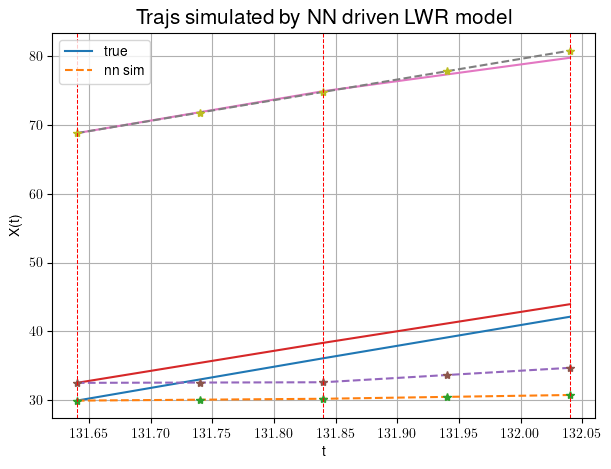

In [12]:
# fig 
width, height = 7, 5
fig, ax = plt.subplots(figsize=(width,height))

for veh in range(0,N):
    ax.plot(tstamps, scn['Xarr'][veh])
    ax.plot(t_ann_end, x_ann_end[veh], '--')
    ax.plot(tshat, Xhat[veh], '*')

for ts in tstamps:
    ax.axvline(x = ts, color = 'red', linestyle = '--', linewidth=0.75)
    
# Annotate the name of each variable at the last value
plot_annotation(ax, scn, trajs, scale=1.004)

ax.set_xlabel("t")
ax.set_ylabel("X(t)")
ax.set_title(title, fontsize=15)
# Limits for the plot
#plot_limits(ax, scn, trajs, xbal=0.01, ybal=0.05)
plt.legend(labels_plot)
plt.grid()
plt.show()

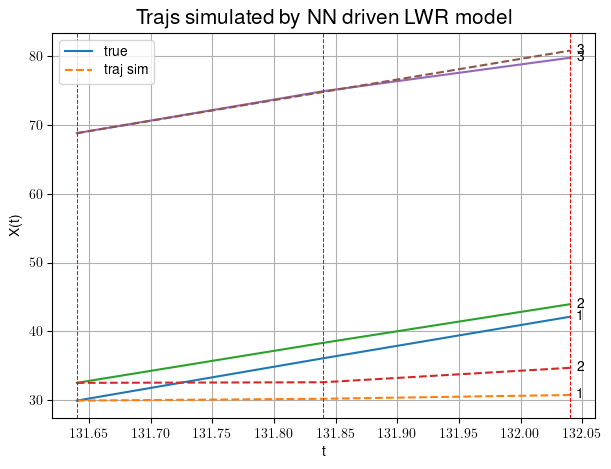

In [37]:
# plot function
t_ann_matched, trajs_ann_matched = match_timestamps_scene(t_ann_end, x_ann_end)
tscale = 1+(tstamps[-1]-tstamps[0])/10000
plot_scn(scn, traj_sim = trajs_ann_matched, xbal=0.01, ybal=0.05, scale=tscale)

# Step 2: Optimization with blackbox approach

In [14]:
# definition with freezed parameteres regarding the scene.
def f_wrapped(v0):
    t_ann_end, x_ann_end, _ = odesolver_ann_scene(model, scn, epochs, batch_size, v0, verbose=0)
    return x_ann_end

In [15]:
def loss_fun(v0):
    "Loss function"
    
    X = f_wrapped(v0)
    Xupd = [traj[idx] for traj in np.array(X)] # extracting the same index as in X
        
    mse = mean_squared_error(Xhat, Xupd)
    
#     res = 0
#     for i in range(0,N):
#         for j in range(0,M):
#             tmp = Xupd[i][j] - Xhat[i][j]
#             res += (tmp**2)/M
            
#     res = res/N
    
    return mse

In [16]:
# using the parameters used in the creation of synthetic data the loss must be 0!
mse = loss_fun(v0)

We have 2 time intervals inside [131.64,132.04]

----------------------------------------------------------------------------------------------------
Time interval n.0: [131.64, 131.84]

        * y_true: [30.80073929 29.11067519]
        * y_pred: [4.233269691467285, 22.256824493408203]

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Time interval n.1: [131.84, 132.04]

        * y_true: [30.16079766 28.07097758]
        * y_pred: [5.120154857635498, 29.843721389770508]

----------------------------------------------------------------------------------------------------


In [17]:
mse

8.896448809382136

In [18]:
# initial_guess = [30]

# result = optimize.minimize(loss_fun, initial_guess, method="CG", tol = 1e0, options={'maxiter':3})
# if result.success:
#     fitted_params = result.x
#     print(fitted_params)
# else:
#     raise ValueError(result.message)